In [7]:
import pandas as pd
import os
import numpy as np
import dask.dataframe as dd 
import warnings 
warnings.filterwarnings("ignore")



'/'

In [6]:
import os
os.chdir("\Users\pc\Desktop\ENSAE_1A\Semestre_3\Stat_app")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (2015314616.py, line 2)

In [2]:
# Fichier avec les variables d'intéret :

df_cct = pd.read_parquet("cct_var_new.parquet")

FileNotFoundError: [Errno 2] No such file or directory: 'cct_var_new.parquet'

In [9]:
df_cct.head()

,User,Card,timestamp,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,...,wk_i_amt,wk_med_amt,wk_i_med_amt,nbt_wk_i/amt_wk_i,amt/day_income,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk
0,0,0,2002-09-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,5300,None,...,1380.96,1380.96,90.015,0.177748,0.819868,0.0,1.0,134.09,134.090,0.007458
1,0,0,2002-09-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,5411,None,...,1380.96,1380.96,90.015,0.177748,0.235279,0.0,2.0,172.57,86.285,0.011589
2,0,0,2002-09-02 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,5411,None,...,1380.96,1380.96,90.015,0.177748,0.735796,0.0,3.0,292.91,120.340,0.010242
3,0,0,2002-09-02 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,5651,None,...,1380.96,1380.96,90.015,0.177748,0.788441,0.0,4.0,421.86,124.645,0.009482
4,0,0,2002-09-03 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,5912,None,...,1380.96,1380.96,90.015,0.177748,0.640230,0.0,5.0,526.57,120.340,0.009495


In [3]:
#df_cct.columns

# Retirer les variables inutiles : ?????????????????????????????????????????????
# merchant_user_state_is_diff inutile : toujours identique 
df_cct =  df_cct.drop(["merchant_user_state_is_diff"], axis = 1)

In [4]:
df_cct =  df_cct.drop(["date"], axis = 1) # toute l'information est dans timestamp

In [5]:
df_cct =  df_cct.drop(["Zip"], axis = 1) # inutile : information avec Merchant City (suffisamment précis)

In [6]:
# Drop "User" et "Merchant Name" : Discriment trop les transactions en fonctions des Users : on veut 
# une analyse sur les transactions.

df_cct =  df_cct.drop(["User", "Merchant Name"], axis = 1)


In [11]:
# Gérer les variables catégorielles pour DBSCAN. 
# Eviter le problème de hiérarchie entre les modalités : 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?fbclid=IwAR2eCoPI9skUHDegZeP31K--Psh2thHY_5anQPtngWD6qU3caG1UxFdwtR4

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Ex : On commence par les colonnes "Use Chip"       (A faire "Errors?", "Merchant State", "Merchant City")

enc = OneHotEncoder(handle_unknown='ignore')


features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

In [8]:
features_labels = np.hstack(np.array(enc.categories_))

In [10]:
df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [11]:
df_cct.head()

,Card,timestamp,Amount,Use Chip,Merchant City,Merchant State,MCC,Errors?,Is Fraud?,delta_t_s,...,nbt_wk_i/amt_wk_i,amt/day_income,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk,Chip Transaction,Online Transaction,Swipe Transaction
0,0,2002-09-01 06:21:00,134.09,Swipe Transaction,La Verne,CA,5300,None,0,0,...,0.177748,0.819868,0.0,1.0,134.09,134.090,0.007458,0.0,0.0,1.0
1,0,2002-09-01 06:42:00,38.48,Swipe Transaction,Monterey Park,CA,5411,None,0,1260,...,0.177748,0.235279,0.0,2.0,172.57,86.285,0.011589,0.0,0.0,1.0
2,0,2002-09-02 06:22:00,120.34,Swipe Transaction,Monterey Park,CA,5411,None,0,85200,...,0.177748,0.735796,0.0,3.0,292.91,120.340,0.010242,0.0,0.0,1.0
3,0,2002-09-02 17:45:00,128.95,Swipe Transaction,Monterey Park,CA,5651,None,0,40980,...,0.177748,0.788441,0.0,4.0,421.86,124.645,0.009482,0.0,0.0,1.0
4,0,2002-09-03 06:23:00,104.71,Swipe Transaction,La Verne,CA,5912,None,0,45480,...,0.177748,0.640230,0.0,5.0,526.57,120.340,0.009495,0.0,0.0,1.0


In [12]:
# Pour :"Merchant State", "Merchant City": 

#enc = OneHotEncoder(handle_unknown='ignore')

#features_array = enc.fit_transform(df_cct[["Merchant State", "Merchant City"]]).toarray()


In [13]:
#features_labels = np.hstack(np.array(enc.categories_))

In [14]:
#df_cct_add = pd.concat([df_cct_add, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [15]:
# Gérer les dates : "date", "timestamp" : garder que timesstamp le plus précis : supprimer les tirets : 
# df_cct["date"] = df_cct["date"].str.replace("-","")


df_cct["timestamp"] = df_cct["timestamp"].values.astype("float64")
# Gerer le type : datetime64[ns]
df_cct.head()

,Card,timestamp,Amount,Use Chip,Merchant City,Merchant State,MCC,Errors?,Is Fraud?,delta_t_s,...,nbt_wk_i/amt_wk_i,amt/day_income,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk,Chip Transaction,Online Transaction,Swipe Transaction
0,0,1.030861e+18,134.09,Swipe Transaction,La Verne,CA,5300,None,0,0,...,0.177748,0.819868,0.0,1.0,134.09,134.090,0.007458,0.0,0.0,1.0
1,0,1.030863e+18,38.48,Swipe Transaction,Monterey Park,CA,5411,None,0,1260,...,0.177748,0.235279,0.0,2.0,172.57,86.285,0.011589,0.0,0.0,1.0
2,0,1.030948e+18,120.34,Swipe Transaction,Monterey Park,CA,5411,None,0,85200,...,0.177748,0.735796,0.0,3.0,292.91,120.340,0.010242,0.0,0.0,1.0
3,0,1.030989e+18,128.95,Swipe Transaction,Monterey Park,CA,5651,None,0,40980,...,0.177748,0.788441,0.0,4.0,421.86,124.645,0.009482,0.0,0.0,1.0
4,0,1.031034e+18,104.71,Swipe Transaction,La Verne,CA,5912,None,0,45480,...,0.177748,0.640230,0.0,5.0,526.57,120.340,0.009495,0.0,0.0,1.0


In [16]:
# Temporairement : (on a pas encore gérer ces variables catégorielles)

df_cct =  df_cct.drop(["Merchant State", "Merchant City", "Errors?" ], axis = 1)

In [18]:
# On a géré la variable catégorielle Use Chip
df_cct =  df_cct.drop(["Use Chip" ], axis = 1)

In [19]:
# On retire également la variable "Card" : pas d'intérêt pour le clustering
# On souhaite étudier les types de transaction de manière générale. 
df_cct =  df_cct.drop(["Card" ], axis = 1)

In [20]:
df_cct.head()

,timestamp,Amount,MCC,Is Fraud?,delta_t_s,delta_t_s_card,day_amt,day_nbt,day_med_nbt,wk_i_nbt,...,nbt_wk_i/amt_wk_i,amt/day_income,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk,Chip Transaction,Online Transaction,Swipe Transaction
0,1.030861e+18,134.09,5300,0,0,0,172.57,2,2.0,16.0,...,0.177748,0.819868,0.0,1.0,134.09,134.090,0.007458,0.0,0.0,1.0
1,1.030863e+18,38.48,5411,0,1260,1260,172.57,2,2.0,16.0,...,0.177748,0.235279,0.0,2.0,172.57,86.285,0.011589,0.0,0.0,1.0
2,1.030948e+18,120.34,5411,0,85200,85200,249.29,2,2.0,16.0,...,0.177748,0.735796,0.0,3.0,292.91,120.340,0.010242,0.0,0.0,1.0
3,1.030989e+18,128.95,5651,0,40980,40980,249.29,2,2.0,16.0,...,0.177748,0.788441,0.0,4.0,421.86,124.645,0.009482,0.0,0.0,1.0
4,1.031034e+18,104.71,5912,0,45480,45480,190.90,2,2.0,16.0,...,0.177748,0.640230,0.0,5.0,526.57,120.340,0.009495,0.0,0.0,1.0


In [21]:
# Centrer réduire les variables : 

for i in range(len(df_cct.columns)):
    mean = np.mean(df_cct[df_cct.columns[i]])
    ec = np.std(df_cct[df_cct.columns[i]])
    df_cct[df_cct.columns[i]] = (df_cct[df_cct.columns[i]]-mean)/ec


df_cct.head()

,timestamp,Amount,MCC,Is Fraud?,delta_t_s,delta_t_s_card,day_amt,day_nbt,day_med_nbt,wk_i_nbt,...,nbt_wk_i/amt_wk_i,amt/day_income,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk,Chip Transaction,Online Transaction,Swipe Transaction
0,-1.920203,1.102821,-0.297017,-0.034953,-0.000006,-0.092117,-0.129295,-1.008424,-50.204151,-0.784566,...,NaN,-0.013158,-0.069941,-1.783847,-1.237541,4.494401,NaN,-0.589402,-0.353815,0.764851
1,-1.920196,-0.062837,-0.170782,-0.034953,0.000321,-0.090357,-0.129295,-1.008424,-50.204151,-0.784566,...,NaN,-0.015758,-0.069941,-1.710999,-1.187297,2.350360,NaN,-0.589402,-0.353815,0.764851
2,-1.919666,0.935184,-0.170782,-0.034953,0.022107,0.026931,0.245528,-1.008424,-50.204151,-0.784566,...,NaN,-0.013532,-0.069941,-1.638150,-1.030167,3.877718,NaN,-0.589402,-0.353815,0.764851
3,-1.919411,1.040155,0.102158,-0.034953,0.010630,-0.034856,0.245528,-1.008424,-50.204151,-0.784566,...,NaN,-0.013297,-0.069941,-1.565301,-0.861794,4.070796,NaN,-0.589402,-0.353815,0.764851
4,-1.919129,0.744626,0.398979,-0.034953,0.011798,-0.028569,-0.039742,-1.008424,-50.204151,-0.784566,...,NaN,-0.013957,-0.069941,-1.492453,-0.725072,3.877718,NaN,-0.589402,-0.353815,0.764851


In [30]:
# On supprime les colonnes avec que des NaN : nbt_wk_i/amt_wk_i et rolling_nbt_wk/amt_wk
df_cct = df_cct.dropna(axis=1)
df_cct.head()


MemoryError: Unable to allocate 4.36 GiB for an array with shape (24, 24386900) and data type float64

In [8]:
import pandas.util.testing as tm
import seaborn as sns
from sklearn import cluster 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import umap
from collections import Counter

In [ ]:
# Implémentation de DBSCAN : 


X = df_cct_add.values
X.astype(np.float64)

clustering=cluster.DBSCAN(eps=0.30, min_samples=2)
clustering.fit(X)


In [ ]:
# Choix de eps et min_samples :

# Choix de eps

Eps=np.linspace(1,2.5,num=10)
N=[]
L=[]
for eps in Eps:
  clustering =  cluster.DBSCAN(eps=eps, min_samples=5)
  clustering.fit(X)
  labels = clustering.labels_
  L.append(labels)
  n=np.unique(labels)
  N+=[len(n)]

sns.lineplot(x=Eps,y=N)

In [ ]:
# Nbr d'outliers : 

for s in L:
    d = Counter(s)
    for i in d:
        print(i, d[i])

In [ ]:
# Choix de min_samples : 

Eps = [2.0,2.1,2.2,2.3,2.4]
N=[]

x = []
hue = []

for sample in Sample:
  for eps in Eps:
    clustering=cluster.DBSCAN(eps, min_samples=sample)
    clustering.fit(X)
    labels=clustering.labels_
    n=np.unique(labels)
    N+=[len(n)]

    x.append(eps) 
    hue.append(sample)

sns.lineplot(x= hue,y=N, hue = x)

In [ ]:
# Choix intéressant pour eps et min_samples : 


clustering=cluster.DBSCAN(eps=2.25, min_samples=5)
clustering.fit(X)
np.unique(clustering.labels_)


# Nombre de groupes : 

In [ ]:
labels = clustering.labels_
d = Counter(labels)
d[-1]

# Nombre d'outliers : 

In [16]:
# ACP : réduction de dimension => représenter la méthode DBSCAN (nuage de points)
df_cct_add = df_cct_add.dropna() 

pca = PCA()
pca.fit(df_cct_add)

df_cct_pca = pca.transform(df_cct_add)
df_cct_pca_df = pd.DataFrame({
    "Dim1" : df_cct_pca[:,0], 
    "Dim2" : df_cct_pca[:,1]})
#df_cct_pca_df["labels"] = clustering.labels_



In [18]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.78105705e+00 2.42872991e+00 1.91882646e+00 1.25482541e+00
 1.07463175e+00 1.02823427e+00 1.00790380e+00 9.99772204e-01
 9.97516290e-01 9.92780181e-01 9.77408381e-01 8.84514504e-01
 7.50172653e-01 5.55975028e-01 4.58889157e-01 2.57202425e-01
 2.29382726e-01 1.99240379e-01 1.22151018e-01 4.74410844e-02
 3.34130320e-02 5.94844235e-09]
[2.62774512e-01 1.10396474e-01 8.72191160e-02 5.70373431e-02
 4.88467472e-02 4.67377776e-02 4.58136682e-02 4.54440512e-02
 4.53415100e-02 4.51262330e-02 4.44275169e-02 4.02050810e-02
 3.40986520e-02 2.52715144e-02 2.08585338e-02 1.16909833e-02
 1.04264555e-02 9.05635300e-03 5.55230193e-03 2.15640629e-03
 1.51876951e-03 2.70382911e-10]


In [20]:
# Faire apparaître les valeurs propres sur l'ACP.  => Interpréter / comprendre les axes + représentatifs ? 


eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig


,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.781057e+00,26.0,26.0
1,Dim2,2.428730e+00,11.0,37.0
2,Dim3,1.918826e+00,9.0,46.0
3,Dim4,1.254825e+00,6.0,52.0
4,Dim5,1.074632e+00,5.0,57.0
5,Dim6,1.028234e+00,5.0,61.0
6,Dim7,1.007904e+00,5.0,66.0
7,Dim8,9.997722e-01,5.0,70.0
8,Dim9,9.975163e-01,5.0,75.0
9,Dim10,9.927802e-01,5.0,79.0


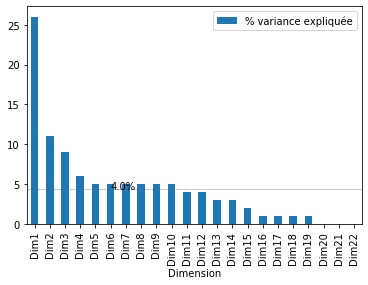

In [30]:
import matplotlib.pyplot as plt

eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 100/(len(pca.explained_variance_)+1), str(np.round(100/(len(pca.explained_variance_)+1)))+"%") # ajout de texte
plt.axhline(y = (100/(len(pca.explained_variance_)+1)), linewidth = .5, color = "dimgray", linestyle = "--") # (100/(len(pca.explained_variance_)+1)) (nb dimensions)
plt.show()


In [ ]:
# Représentation de DBSCAN avec l'ACP : 

sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data = df_cct_pca_df, x = "Dim1", y = "Dim2", hue = df_cct_pca_df["labels"], palette="Spectral")

In [ ]:
# ACP en cascade :........................
#- ACP en cascade : sélectionner 10 familles de variables, faire une ACP sur chaque famille, 
# récupérer les axes, faire une 2e ACP sur toutes les ACP (pour enlever le problème des variables catégorielles)
# Sparse ACP ?

In [ ]:
# UMAP : autre méthode de réduction de dimension :


reducer = umap.UMAP()
reduced_X = reducer.fit_transform(df_cct_add.values)

In [ ]:
reduced_df = pd.DataFrame(reduced_X, columns = ["A1", "A2"])
reduced_df["Label"] = clustering.labels_

In [ ]:
# Représentation de DBSCAN avec UMAP : 

sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data = reduced_df, x = "A1", y = "A2", hue = "Label", palette="Spectral")